In [14]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
import re


# Load the dataset
df = pd.read_csv('cleaned_data.csv')


In [15]:
import nltk
import nltk.sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/dp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/dp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dp/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

.

.   

Q1) What is the overall sentiment of customers towards Flipkart's phone products ?

In [18]:
# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Convert 'review' column to strings and handle missing values
data['summary'] = data['summary'].astype(str)

# Calculate sentiment scores for each review
data['sentiment_score'] = data['summary'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Calculate overall sentiment
overall_sentiment = data['sentiment_score'].mean()
# Determine sentiment classification based on a threshold
threshold = 0.1  # You can adjust this threshold as needed

if overall_sentiment > threshold:
    sentiment_classification = 'Positive'
elif overall_sentiment < -threshold:
    sentiment_classification = 'Negative'
else:
    sentiment_classification = 'Neutral'
print(f'Overall Sentiment Score: {overall_sentiment}')
print(f'Overall Sentiment: {sentiment_classification}')


Overall Sentiment Score: 0.3125667455693129
Overall Sentiment: Positive


.

Q2) How does the sentiment towards Flipkart's phone products vary across different geographical regions?

                      location sentiment  overall_sentiment_score
24                       Ajmer  Positive                 0.620150
73                    Amravati   Neutral                 0.313233
247                Barrackpore   Neutral                 0.256150
255                     Basoda   Neutral                 0.318000
507                   Chogawan   Neutral                 0.000000
648                 Dongargaon  Positive                 0.475400
783                      Gomoh  Positive                 0.624900
795         Gorakhpur Division  Positive                 0.485500
1009                Jhunjhunun  Positive                 0.636000
1059        Kallur Thekkummuri  Negative                -0.440400
1276               Kulathummal  Positive                 0.624900
1303               Kuttiattoor   Neutral                 0.210750
1329                 Lawngtlai  Positive                 0.571900
1428                 Manassery  Positive                 0.440400
1973      

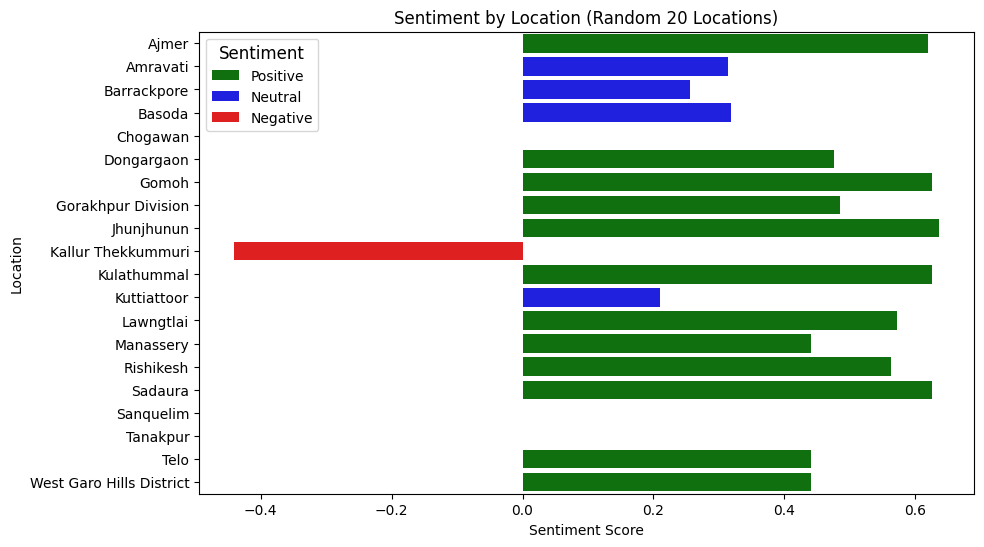

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random



# Set the threshold for sentiment classification
threshold = 0.1  # You can adjust this threshold as needed

# Create a 'sentiment' column based on the threshold
data['sentiment'] = data['sentiment_score'].apply(lambda score: 'Positive' if score > threshold
                                                 else 'Negative' if score < -threshold
                                                 else 'Neutral')

# Group data by location and sentiment
location_sentiment = data.groupby(['location', 'sentiment'])['sentiment_score'].mean().reset_index()





# Create a table with location, overall sentiment score, and sentiment category for all unique locations
real_locations_sentiment = location_sentiment.groupby('location')['sentiment'].apply(lambda x: x.mode().iloc[0]).reset_index()
real_locations_sentiment['overall_sentiment_score'] = location_sentiment.groupby('location')['sentiment_score'].mean().reset_index()['sentiment_score']
#print(real_locations_sentiment)

# Get a random sample of 20 unique locations
random_locations = random.sample(real_locations_sentiment['location'].unique().tolist(), 20)
# Filter the data for the random locations
random_location_sentiment = real_locations_sentiment[real_locations_sentiment['location'].isin(random_locations)]


print(random_location_sentiment)

# Print the table
real_locations_sentiment.to_csv('real_locations_sentiment.csv', index=False)

# Create a bar plot to visualize sentiment by location for the random 20 locations
plt.figure(figsize=(10, 6))
sns.barplot(x='overall_sentiment_score', y='location', data=random_location_sentiment, hue='sentiment',
            palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'})
plt.title('Sentiment by Location (Random 20 Locations)')
plt.xlabel('Sentiment Score')
plt.ylabel('Location')
plt.legend(title='Sentiment', title_fontsize=12)
plt.show()




. 

.

3.a) Which Flipkart phone product has the most positive reviews?

In [20]:
# Group data by product title and calculate the mean sentiment score
product_sentiment = data.groupby('product_title')['sentiment_score'].mean().reset_index()

# Find the product with the highest mean sentiment score
most_positive_product = product_sentiment.loc[product_sentiment['sentiment_score'].idxmax()]

print(f'Most Positive Product: {most_positive_product["product_title"]}')


Most Positive Product: realme C55 (Rainforest, 64 GB)


.

3.b)Which Flipkart phone product has the most negative reviews?

In [21]:
# Find the product with the lowest mean sentiment score
most_negative_product = product_sentiment.loc[product_sentiment['sentiment_score'].idxmin()]

print(f'Most Negative Product: {most_negative_product["product_title"]}')


Most Negative Product: Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio


.

.

4.a)What are the most common keywords associated with positive reviews of Flipkart's phone products?

In [22]:
import pandas as pd
import re
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize

# Set the threshold for positivity
threshold = 0.1

# Filter positive reviews based on the sentiment_score threshold
positive_reviews = data[data['sentiment_score'] > threshold]['summary']

# Initialize a list of stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and count words in positive reviews
positive_words = [word for review in positive_reviews for word in word_tokenize(review.lower()) if word.isalpha() and word not in stop_words]

# Create a Counter to count the most common positive keywords
positive_word_counts = Counter(positive_words)

# Get the most common positive keywords
most_common_positive_keywords = positive_word_counts.most_common(10)

# Create a DataFrame from the list of most common positive keywords
df = pd.DataFrame(most_common_positive_keywords, columns=['Keyword', 'Count'])

# Display the DataFrame
print(df)


     Keyword  Count
0    product   2267
1       good   1628
2   terrific    958
3    awesome    957
4       nice    866
5      worth    813
6  wonderful    767
7      money    539
8  brilliant    530
9     classy    524


.

4.b)What are the most common keywords associated with negative reviews of Flipkart's phone products?

In [23]:


# Set the threshold for negativity
threshold = -0.1

# Filter negative reviews based on the sentiment_score threshold
negative_reviews = data[data['sentiment_score'] < threshold]['summary']

# Initialize a list of stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and count words in negative reviews
negative_words = [word for review in negative_reviews for word in word_tokenize(review.lower()) if word.isalpha() and word not in stop_words]

# Create a Counter to count the most common negative keywords
negative_word_counts = Counter(negative_words)

# Get the most common negative keywords
most_common_negative_keywords = negative_word_counts.most_common(10)

# Create a DataFrame from the list of most common negative keywords
df = pd.DataFrame(most_common_negative_keywords, columns=['Keyword', 'Count'])

# Display the DataFrame
print("most_common_negative_keywords"+"\n")
print(df)


most_common_negative_keywords

        Keyword  Count
0       product    301
1  disappointed    260
2      horrible    188
3         waste    187
4         money    187
5         hated    187
6   recommended    179
7       utterly    176
8          poor    168
9       useless    165


.

.

5)Are there any inconsistencies between the rating given by the reviewer and the content of the review and summary, indicating potential fake reviews?

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Convert 'review' and 'summary' columns to strings and handle missing values
data['review'] = data['review'].fillna('').astype(str)
data['summary'] = data['summary'].fillna('').astype(str)

# Define a function to check for inconsistencies between the rating, review, and summary
def check_for_inconsistencies(row):
    # Calculate the sentiment score of the review and summary
    vader = SentimentIntensityAnalyzer()
    review_sentiment_score = vader.polarity_scores(row['review'])['compound']
    summary_sentiment_score = vader.polarity_scores(row['summary'])['compound']

    # Check if the sentiment scores are inconsistent with the rating
    if (row['rating'] >= 3 and (review_sentiment_score < -0.5 or summary_sentiment_score < -0.5)) or (row['rating'] <= 2 and (review_sentiment_score > 0.5 or summary_sentiment_score > 0.5)):
        return True

    return False

# Identify reviews with potential inconsistencies
data['has_inconsistencies'] = data.apply(check_for_inconsistencies, axis=1)

# Filter reviews with potential inconsistencies
reviews_with_potential_inconsistencies = data[data['has_inconsistencies']]

# Select the four columns you want to save to the CSV
selected_columns = reviews_with_potential_inconsistencies[['product_id', 'rating', 'review', 'summary']]

# Save the selected columns to a CSV file
selected_columns.to_csv('reviews_with_inconsistencies.csv', index=False)






.

.

6) Do lower-priced products tend to have more positive sentiments than higher-priced ones?

   product_price  average_sentiment_score
8           1549                 0.200952
3           5499                 0.313121
7           6499                 0.203266
5           7299                 0.270699
6           8499                 0.228691
4           9999                 0.292494
2          10999                 0.340272
0          11999                 0.404513
1          13999                 0.345647


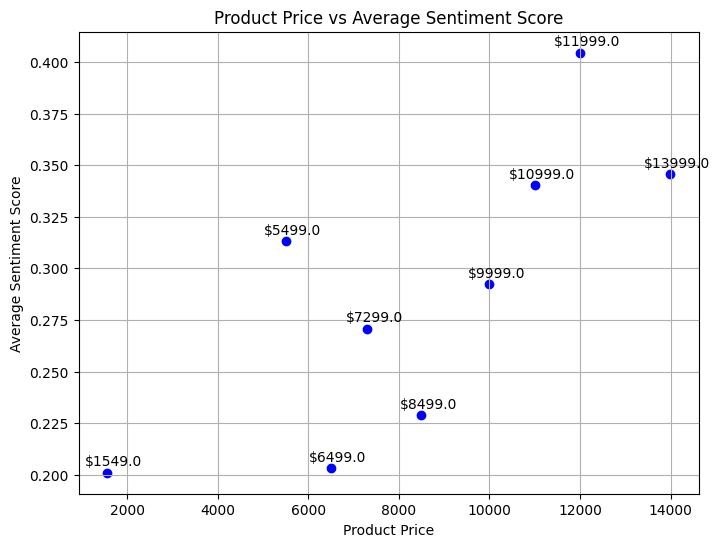

In [24]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv('cleaned_data.csv')
df['summary'] = df['summary'].astype(str)
df['review'] = df['review'].astype(str)

# Calculate the sentiment score of the review and summary
vader = SentimentIntensityAnalyzer()
df['summary_sentiment_score'] = df['summary'].apply(lambda x: vader.polarity_scores(x)['compound'])
df['review_sentiment_score'] = df['review'].apply(lambda x: vader.polarity_scores(x)['compound'])

# Combine the review and summary sentiment scores
df['combined_sentiment_score'] = (df['review_sentiment_score'] + df['summary_sentiment_score']) / 2

# Calculate the average sentiment score for each product price
product_price_groups = df.groupby('disc_price')
product_price_group_average_sentiment_scores = product_price_groups['combined_sentiment_score'].mean()

# Sort the product price groups by average sentiment score
product_price_groups_sorted_by_average_sentiment_score = product_price_group_average_sentiment_scores.sort_values(ascending=False)

# Create a table with the grouped price and corresponding sentiment score
table = product_price_groups_sorted_by_average_sentiment_score.to_frame().reset_index()
table.columns = ['product_price', 'average_sentiment_score']

table['product_price'] = table['product_price'].str.replace(',', '').astype(int)

table_sorted=table.sort_values('product_price')

# Print the table
print(table_sorted)

# Return the table as a CSV
table.to_csv('product_price_groups_sorted_by_average_sentiment_score', index=False)

#plotting

plt.figure(figsize=(8, 6))
plt.scatter(table_sorted['product_price'], table_sorted['average_sentiment_score'], color='blue')
plt.title('Product Price vs Average Sentiment Score')
plt.xlabel('Product Price')
plt.ylabel('Average Sentiment Score')
plt.grid(True)

for i, row in table_sorted.iterrows():
    plt.annotate(f"${row['product_price']}", (row['product_price'], row['average_sentiment_score']), textcoords="offset points", xytext=(5,5), ha='center')

plt.show()


.

.

7) Is there a correlation between products having less discount percentage and higher negative sentiment in reviews?

In [25]:

from scipy.stats import pearsonr

# Calculate the correlation between discount percentage and combined sentiment score
correlation = df['Disc__perc'].corr(df['combined_sentiment_score'])

# Print the correlation
print(f'Correlation between discount percentage and sentiment score: {correlation}')

# Check if the correlation is statistically significant
p_value = pearsonr(df['Disc__perc'], df['combined_sentiment_score'])[1]

if p_value < 0.05:
    print('The correlation is statistically significant.')
else:
    print('The correlation is not statistically significant.')

# Group by discount percentage and calculate the mean sentiment score
discount_sentiment_table = df.groupby('Disc__perc')['combined_sentiment_score'].mean().reset_index()
discount_sentiment_table.columns = ['discount_percentage', 'sentiment_score']

# Print the table
print(discount_sentiment_table)


Correlation between discount percentage and sentiment score: -0.1181501440868927
The correlation is statistically significant.
   discount_percentage  sentiment_score
0                    3         0.200952
1                   12         0.345647
2                   14         0.404513
3                   15         0.380515
4                   26         0.300163
5                   33         0.283519
6                   35         0.203266
7                   38         0.313121
8                   39         0.228691


.

.

8) Total Negative ,Positive and neutral Reviews for each discount percentage category.

In [26]:
# Categorize sentiment into positive, negative, or neutral
df['sentiment_category'] = df['combined_sentiment_score'].apply(
    lambda score: 'Positive' if score > 0.1 else 'Negative' if score < -0.1 else 'Neutral'
)

# Group by discount percentage and sentiment category
grouped = df.groupby(['Disc__perc', 'sentiment_category'])['product_id'].count().reset_index()

# Pivot the table to have sentiment categories as columns
pivot_table = grouped.pivot(index='Disc__perc', columns='sentiment_category', values='product_id').reset_index()

# Fill NaN values with 0
pivot_table.fillna(0, inplace=True)

# Rename columns
pivot_table.columns = ['discount_percentage', 'Negative', 'Neutral', 'Positive']

# Calculate the total count of reviews (combining all sentiments)
pivot_table['Total'] = pivot_table['Negative'] + pivot_table['Neutral'] + pivot_table['Positive']
total_reviews=pivot_table['Total'].sum()

# Sort the table by discount percentage
sorted_table = pivot_table.sort_values(by='discount_percentage')

# Print the sorted table
print(sorted_table)
print("total_reviews = "+str(total_reviews))

   discount_percentage  Negative  Neutral  Positive  Total
0                    3        55       14       131    200
1                   12       357      138      2505   3000
2                   14       107       43      1160   1310
3                   15       282      135      2573   2990
4                   26       522      189      2289   3000
5                   33       310      105      1285   1700
6                   35       514      118      1368   2000
7                   38       322       58      1620   2000
8                   39        68       12       196    276
total_reviews = 16476


.

.

9) How has the sentiment towards Flipkart's products evolved over time?

In [27]:
import pandas as pd
from datetime import datetime, timedelta

# Function to convert string phrases to real dates (without time)
def convert_to_date(date_str):
    if 'days ago' in date_str:
        days = int(date_str.split()[0])
        return (datetime.now() - timedelta(days=days)).date()
    elif 'day ago' in date_str:
        return (datetime.now() - timedelta(days=1)).date()
    elif 'months ago' in date_str:
        months = int(date_str.split()[0])
        return (datetime.now() - timedelta(days=30 * months)).date()
    elif 'month ago' in date_str:
        return (datetime.now() - timedelta(days=30)).date()
    else:
        return None  # If the string doesn't match any format, return None

# Apply the function to the 'Date' column
df['Real_Date'] = df['date'].apply(convert_to_date)



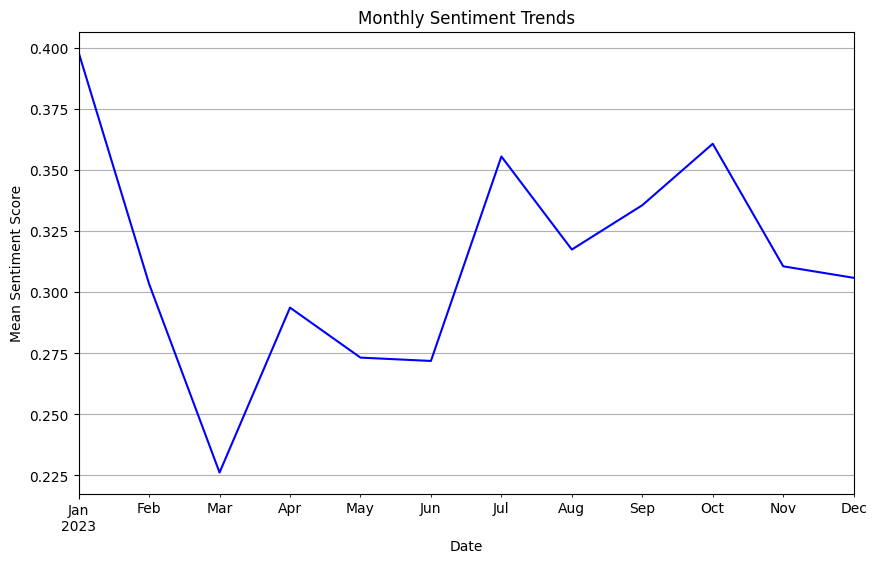

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df['Real_Date'] = pd.to_datetime(df['Real_Date'])
# Set the 'Date' column as the index for time-based analysis
df.set_index('Real_Date', inplace=True)

# Resample the data to aggregate sentiment scores based on monthly periods
monthly_sentiment = df['combined_sentiment_score'].resample('M').mean()

# Plotting sentiment trends over months
plt.figure(figsize=(10, 6))
monthly_sentiment.plot(kind='line', color='blue')
plt.title('Monthly Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()


.

.

10) Are there any products that receive a suspiciously high number of downvotes despite having generally positive reviews, which could indicate potential manipulation?

In [38]:
# Group data by product title and calculate the mean sentiment score
product_sentiment = df.groupby('product_title')['combined_sentiment_score'].mean()

# Define a threshold for suspiciously high downvotes
threshold_downvotes = 2000  # Adjust as needed based on your dataset

# Identify suspicious cases: High downvotes despite positive sentiment
suspicious_products = df.groupby('product_title').filter(lambda x: (x['downvotes'].sum() > threshold_downvotes) and (product_sentiment[x['product_title'].iloc[0]] > 0))

# Print or analyze suspicious_products
print(suspicious_products[['product_title', 'downvotes', 'combined_sentiment_score']])


                                         product_title  downvotes  \
Real_Date                                                           
2023-01-08  SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)        105   
2023-01-08  SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)        180   
2023-04-08  SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)         25   
2023-02-07  SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)         56   
2023-02-07  SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)        100   
...                                                ...        ...   
2023-07-07             realme C55 (Rainy Night, 64 GB)          0   
2023-09-05             realme C55 (Rainy Night, 64 GB)          0   
2023-09-05             realme C55 (Rainy Night, 64 GB)          1   
2023-07-07             realme C55 (Rainy Night, 64 GB)          0   
2023-09-05             realme C55 (Rainy Night, 64 GB)          0   

            combined_sentiment_score  
Real_Date                             
2023-01-08              

In [39]:
# Group by product title and aggregate mean combined sentiment score and sum of downvotes
product_stats = suspicious_products.groupby('product_title').agg({
    'combined_sentiment_score': 'mean',
    'downvotes': 'sum'
}).reset_index()

# Display the mean combined sentiment score and sum of downvotes for each product title
print(product_stats)

                                product_title  combined_sentiment_score  \
0  SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)                  0.300163   
1  SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)                  0.300163   
2  SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)                  0.300163   
3             realme C55 (Rainforest, 128 GB)                  0.345647   
4              realme C55 (Rainforest, 64 GB)                  0.386592   
5            realme C55 (Rainy Night, 128 GB)                  0.345647   
6             realme C55 (Rainy Night, 64 GB)                  0.388617   
7              realme C55 (Sunshower, 128 GB)                  0.345647   
8               realme C55 (Sunshower, 64 GB)                  0.388617   

   downvotes  
0       9293  
1       9293  
2       9293  
3       2665  
4       4623  
5       2665  
6       4794  
7       2665  
8       4794  


.

##############################################################   Thank You   ############################################################################